# 1. Popularity Based Recommendation System

## About the Dataset (jokes.csv)



 
1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").
  
2. One row per user
3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.



In [64]:
import pandas as pd
import seaborn as sns

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Q1. Read the data (jokes.csv)

In [10]:
df_joke=pd.read_csv("C:/Users/HP/Downloads/jokes.csv")

In [11]:
df_joke.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Q2. Create new Dataframe `ratings` starting from column `joke1` and consider first 200 rows only



In [12]:
df_joke=df_joke.iloc[:200,1:]

In [13]:
df_joke

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,5.73,0.00,-0.58,1.75,2.86,7.23,2.04,-4.27,3.11,7.14,...,1.70,4.66,1.65,5.58,5.73,3.50,0.00,-2.04,2.91,1.84
196,1.80,5.39,8.06,-0.10,4.81,4.66,-7.09,-7.72,3.69,4.47,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
197,2.62,-3.79,-1.17,-0.44,-1.02,5.05,-3.69,2.18,3.30,-0.73,...,1.41,-2.52,-0.53,-1.89,1.17,-2.04,-1.17,-0.73,0.73,0.44
198,99.00,99.00,99.00,99.00,7.91,99.00,3.64,-1.89,99.00,99.00,...,2.96,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


### Q3. Preprocess `ratings`


*   Verify presence of null values
*   Replace null with 0



In [27]:
df_joke=df_joke.replace(99.00,0)

### Q4. Find mean for each joke


*   Find mean of 100 jokes



In [28]:
df_stats=df_joke.describe().transpose()

In [29]:
df_stats

,count,mean,std,min,25%,50%,75%,max
Joke1,200.0,0.53005,4.507771,-9.71,-0.8525,0.00,3.4125,9.27
Joke2,200.0,0.59390,4.915306,-9.95,-2.5950,0.00,4.5350,9.27
Joke3,200.0,0.23765,4.471239,-9.71,-0.7275,0.00,2.3300,9.27
Joke4,200.0,-0.70100,3.863859,-9.76,-1.6850,0.00,0.0000,8.83
Joke5,200.0,-0.03790,5.433866,-9.81,-4.2200,0.34,4.2325,9.22
...,...,...,...,...,...,...,...,...
Joke96,200.0,0.41755,2.981439,-9.51,0.0000,0.00,0.0000,9.22
Joke97,200.0,0.75500,3.243612,-9.13,0.0000,0.00,0.1100,9.17
Joke98,200.0,0.09370,3.497441,-9.66,0.0000,0.00,0.0000,9.22
Joke99,200.0,0.13500,3.265586,-9.76,0.0000,0.00,0.0000,8.98


In [35]:
df_stats=df_stats.sort_values(by=['mean'],ascending=False)

### Q5. List most popular 10 jokes

In [38]:
df_stats.head(10)[['mean','min','max']]

,mean,min,max
Joke50,4.05540,-9.81,9.37
Joke36,3.61150,-9.42,9.37
Joke53,3.57150,-9.47,9.37
Joke35,3.22315,-9.81,9.27
Joke29,3.18995,-9.56,9.32
Joke27,3.05240,-9.90,9.13
Joke62,2.86185,-9.81,9.27
Joke49,2.85000,-9.56,9.32
Joke32,2.77955,-9.47,9.27
Joke31,2.65710,-9.90,9.32


#2. Collaborative Filtering based Recommendation System

## About the Dataset

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

#### Execute below cells to read the datasets

In [39]:
books = pd.read_csv("C:/Users/HP/Downloads/BX-Books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


users = pd.read_csv("C:/Users/HP/Downloads/BX-Users.csv", sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv("C:/Users/HP/Downloads/BX-Book-Ratings.csv", sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\HP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3

# Q1. Explore the Dataset

1.   Check shape of all the datasets
2.   Print Columns in all the datasets
3.   Remove last 3 columns of `books` ('imageUrlS', 'imageUrlM', 'imageUrlL')and verify



In [42]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [43]:
books.columns

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'imageUrlS', 'imageUrlM', 'imageUrlL'],
      dtype='object')

In [44]:
users.columns

Index(['userID', 'Location', 'Age'], dtype='object')

In [45]:
ratings.columns

Index(['userID', 'ISBN', 'bookRating'], dtype='object')

In [47]:
books=books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'],axis=1)

In [48]:
books

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [49]:
users

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [50]:
ratings

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


# Q2. Data Preprocessing

### Create new DataFrame `ratings_new` with:
1.   Books from `ratings` Dataset, which exists in `books` Dataset (Intersect on ISBN)
2.   Ratings from `ratings` Dataset, which exists in `users` Dataset (Intersect on userID)


In [56]:
ratings_temp = pd.merge(ratings, books, how='inner', on=['ISBN'])

In [57]:
ratings_temp

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA


In [58]:
ratings_new=pd.merge(ratings_temp, users, how='inner', on=['userID'])

In [59]:
ratings_new

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"tyler, texas, usa",NaN
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa",23.0
...,...,...,...,...,...,...,...,...,...
1031131,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,"genève, genève, switzerland",62.0
1031132,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,"stuttgart, \n/a\""., germany""",NaN
1031133,276647,0553571001,0,Christmas With Anne and Other Holiday Stories:...,L. M. Montgomery,2001,Starfire,"arlington heights, illinois, usa",13.0
1031134,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,"arlington heights, illinois, usa",13.0


# Q3. Data Preprocessing

### In new Dataframe, drop rows with 0 `bookRating`, since 0 is mentioned as 'Implicit Rating'.
#### (Check shape of new Dataframe before and after dropping 0s)


In [ ]:
filt

In [60]:
ratings_new.drop(ratings_new[ratings_new['bookRating'] == 0].index, inplace = True)

In [62]:
ratings_new.shape

(383842, 9)

In [63]:
ratings_new.isnull().sum()

userID                    0
ISBN                      0
bookRating                0
bookTitle                 0
bookAuthor                1
yearOfPublication         0
publisher                 2
Location                  0
Age                  114221
dtype: int64

In [67]:
ratings_new.drop('Age',axis=1,inplace=True)

In [68]:
ratings_new

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,Location
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa"
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa"
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa"
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa"
5,2313,0385482388,5,The Mistress of Spices,Chitra Banerjee Divakaruni,1998,Anchor Books/Doubleday,"cincinnati, ohio, usa"
...,...,...,...,...,...,...,...,...
1031130,276442,2264032960,6,L'Apprenti du diable,Ellis Peters,2001,Editions 10/18,"genève, genève, switzerland"
1031131,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,"genève, genève, switzerland"
1031132,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,"stuttgart, \n/a\""., germany"""
1031134,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,"arlington heights, illinois, usa"


# Q4. Check rating's distribution
### Plot a visual to identify highest occuring rating 

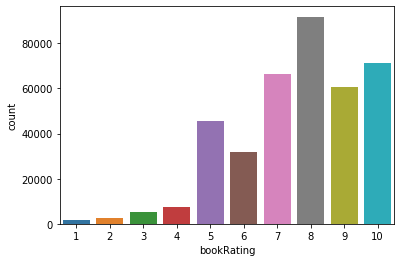

In [65]:
sns.countplot(ratings_new['bookRating'])

# Q5. Build a User-Based Collaborative Filtering model



1.   Consider users who have rated atleast 100 books
2.   Transform data to surprise format
3.   Assure that only user, book and rating columns are present in the new dataset in surprise format



In [130]:
user=ratings_new["userID"].value_counts()
user.sort_values(ascending=False,inplace=True)

In [131]:
user

11676     6943
98391     5691
189835    1899
153662    1845
23902     1180
          ... 
224525     101
146113     101
117384     101
172888     101
109901     101
Name: userID, Length: 440, dtype: int64

In [132]:
user_100=user[user>100]
fin=user_100.index.tolist()

In [134]:
len(fin)

440

In [135]:
ratings_new=ratings_new[ratings_new['userID'].isin(fin)]

In [136]:
ratings_new

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,Location
43,6543,0446605484,10,Roses Are Red (Alex Cross Novels),James Patterson,2001,Warner Vision,"strafford, missouri, usa"
47,6543,0805062971,8,Fight Club,Chuck Palahniuk,1999,Owl Books,"strafford, missouri, usa"
48,6543,0345342968,8,Fahrenheit 451,RAY BRADBURY,1987,Del Rey,"strafford, missouri, usa"
49,6543,0446610038,9,1st to Die: A Novel,James Patterson,2002,Warner Vision,"strafford, missouri, usa"
55,6543,0061009059,8,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,"strafford, missouri, usa"
...,...,...,...,...,...,...,...,...
935544,240543,4888720029,10,Guidelines of faith,Satoru Izumi,1980,Nichiren Shoshu International Center,"millbrae, california, usa"
935545,240543,4888720134,10,Treasures of the heart,Daisaku Ikeda,1982,Nichiren Shoshu International Center,"millbrae, california, usa"
935546,240543,4888720266,10,Songs of victory: Poems and photographs,Daisaku Ikeda,1988,Nichiren Shoshu International Center,"millbrae, california, usa"
935547,240543,4888720304,10,The creative family,Daisaku Ikeda,1992,Nichiren Shoshu International Center,"millbrae, california, usa"


In [115]:
#2 Transform data to surprise format
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor


reader = Reader(rating_scale=(1, 10))

In [117]:
data = Dataset.load_from_df(ratings_new[['userID', 'bookTitle', 'bookRating']], reader)

In [118]:
data

# Q6. Apply SVD for user based filtering


1.   Split the data into train and test
2.   Train model on SVD
3.   Test Accuracy of the model




In [139]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.25,random_state=123)

In [137]:
from surprise import SVD
from surprise import accuracy

In [140]:
svd_model = SVD(n_factors=50)
svd_model.fit(trainset)

In [141]:
test_pred = svd_model.test(testset)

In [142]:
test_pred_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in test_pred])

In [144]:
test_pred_df.head()

,0,1,2
0,143175,Fruitcake (Mira (Audio)),7.484742
1,230522,Anne of the Island,8.548094
2,241198,Brennende Lichter.,7.705180
3,78973,An Unkindness of Ravens,7.594915
4,242465,Love Planets,9.841602


In [145]:
test_pred_df.columns = ["userId","book_name","est_rating"]
test_pred_df.sort_values(by = ["userId", "est_rating"],ascending=False,inplace=True)

In [146]:
test_pred_df

,userId,book_name,est_rating
11430,278418,The Phantom Tollbooth,6.518105
20561,278418,Incident at Twenty-Mile,6.286427
2518,278418,"The Fires of Windameir : Windameir Circle, No 1",6.207724
2519,278418,"Snowfire (Harlequin Romance, No 2973)",6.207724
2537,278418,The Adventures of Tom Sawyer (Modern Library C...,6.207724
...,...,...,...
5614,2033,"Arrow's Fall (The Heralds of Valdemar, Book 3)",8.446037
11405,2033,"Winds of Fate (The Mage Winds, Book 1)",8.438732
13176,2033,"Foods That Harm, Foods That Heal: An A - Z Gu...",8.346722
959,2033,Chemistry,8.318398


In [147]:
accuracy.rmse(test_pred)

RMSE: 1.4977


1.4976939554471669


# Q7. Create a function to generate `n` recommendations for user `x`. (n, x should be parameterized)

In [160]:
def recc(id,num):
    filt=(test_pred_df['userId']==id)
    return test_pred_df.loc[filt].head(num)

recc(2033,10)

,userId,book_name,est_rating
12042,2033,Harry Potter and the Prisoner of Azkaban (Book 3),9.426149
1480,2033,The Giving Tree,9.352774
15610,2033,Something Under the Bed Is Drooling,9.261060
21104,2033,Kushiel's Dart,8.948363
4862,2033,Ender's Shadow,8.938957
17094,2033,Couplehood,8.806325
1018,2033,The Hero and the Crown,8.795046
8895,2033,Cruel Miracles,8.760218
7230,2033,The Girlfriends' Guide to Pregnancy,8.705532
14368,2033,The Ships of Earth : Homecoming: Volume 3 (Hom...,8.693408
